<a href="https://colab.research.google.com/github/Machine-Learning-Tokyo/ELSI-DL-Bootcamp/blob/master/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization (by Alisher)

##Data pre-processing: read and preprocess the data

Import necessary libraries 

In [0]:
import os
import csv
import numpy as np

Get the Github Repository: clone the repository into your Google Drive 
If the folder (ELSI-DL-Bootcamp) already exists in your Google Drive, you can either skip this step or uncomment the first line (which deletes the current folder and clone the repo from scratch) 

In [6]:
! rm -rf ELSI-DL-Bootcamp
!git clone https://github.com/Machine-Learning-Tokyo/ELSI-DL-Bootcamp.git
# !cd "/content/gdrive/My Drive/" && git clone https://github.com/Machine-Learning-Tokyo/ELSI-DL-Bootcamp.git --branch 'feat#data_exploration'

Cloning into 'ELSI-DL-Bootcamp'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 70 (delta 26), reused 31 (delta 9), pack-reused 0
Unpacking objects: 100% (70/70), done.


List the files in the repository. 

We need:


  **1. sat6annotations.csv**: class_names

  **2. X_train_subset.csv**: subset of X_train (i.e., images from DeepSat6 Kaggle Dataset)

  **3. y_train_subset.csv**: subset of y_train (i.e., image labels of X_train images)


In [31]:
from subprocess import check_output
print(check_output(["ls", "./ELSI-DL-Bootcamp"]).decode("utf8"))

Data_Exploration.ipynb
data_visualization.ipynb
deepsat.png
kaggle_sat.ipynb
README.md
sat6annotations.csv
X_train_subset.csv
y_train_subset.csv



Import panda library and read csv files using panda:
- [pandas](https://pandas.pydata.org):  is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python.

In [34]:
import pandas as pd
X_train = pd.read_csv('./ELSI-DL-Bootcamp/X_train_subset.csv', header=None)
y_train = pd.read_csv('./ELSI-DL-Bootcamp/y_train_subset.csv', header=None)
class_names = list(pd.read_csv('./ELSI-DL-Bootcamp/sat6annotations.csv', header=None)[0])

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Class names: {}".format(class_names))

Shape of X_train: (3000, 3136)
Shape of y_train: (3000, 6)
Class names: ['building', 'barren_land', 'trees', 'grassland', 'road', 'water']


**y_train (labels) are one-hot-vectors, indicating the class with "1" entries**

In [35]:
print(y_train.loc[:5,:].values)

[[0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [1 0 0 0 0 0]]


**We need categorical labels for visual consistency**

In [0]:
feat_cols = ['pixel'+str(i) for i in range(X_train.shape[1])]
df = pd.DataFrame(X_train.values, columns=feat_cols)

labels = []
numeric_labels = []
for _, cols in y_train.iterrows():
    labels.append(class_names[np.argmax(cols.to_list())])
    numeric_labels.append(np.argmax(cols.to_list()))


df['y'] = labels
df['numeric_label'] = numeric_labels


**Let's check how many data we have for each class:**

In [37]:
for label_name in class_names:
  print("{}: {}".format(label_name, labels.count(label_name)))

building: 147
barren_land: 659
trees: 526
grassland: 495
road: 62
water: 1111


## Data Visualization (Reference: [data visualization](https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b))

###Import necessary libraries: 

- [seaborn](https://seaborn.pydata.org): is a Python data visualization library based on matplotlib, provides a high-level interface for drawing attractive and informative statistical graphics.
- [sklearn](http://scikit-learn.github.io/stable): is a library in Python that provides many unsupervised and supervised learning algorithms. It’s built upon NumPy, pandas, and Matplotlib.
- [matplotlib](https://matplotlib.org): Matplotlib is a Python 2D plotting library which provides high quality figures.
- [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html): **Principal Component Analysis (PCA)** is a linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
- [sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html): **t-distributed Stochastic Neighbor Embedding (t-SNE)** is a tool to visualize high-dimensional data. Mostly is is good to use t-SNE with some dimensionality reduction algorithms (for example, PCA)
- matplotlib.pyplot


In [0]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
import time


This is for reproducability of the results (seed):

In [0]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

**Fit PCA (with 3 principal components) to our data. PCA is using the correlation between some dimensions and tries to provide a minimum number of variables that keeps the maximum amount of variation or information about how the original data is distributed.**


In [40]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

# add new columns to our dataFrame: pca-one, pca-two, pca-three
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.65892326 0.17176854 0.01565496]


**These variations mean:**
*   the 1st principal component of PCA (first dimension of compressed data) has the highest variance: **0.65892326**
*   the 2nd principal component of PCA (second dimension of compressed data) has the variance of: **0.17176854**
*   the 3rd principal component of PCA (third dimension of compressed data) has the variance of: **0.01565496**

**Which means:**
*   we saved **84%** of information from original data (images)
*   when we describe the data with 3 dimensions, we would lose **16%** of information
*   when we describe the data with 2 dimensions, we would lose **17.5%** of information






Text(0.5, 1.0, 'First two dimensions of PCA-compressed-data')

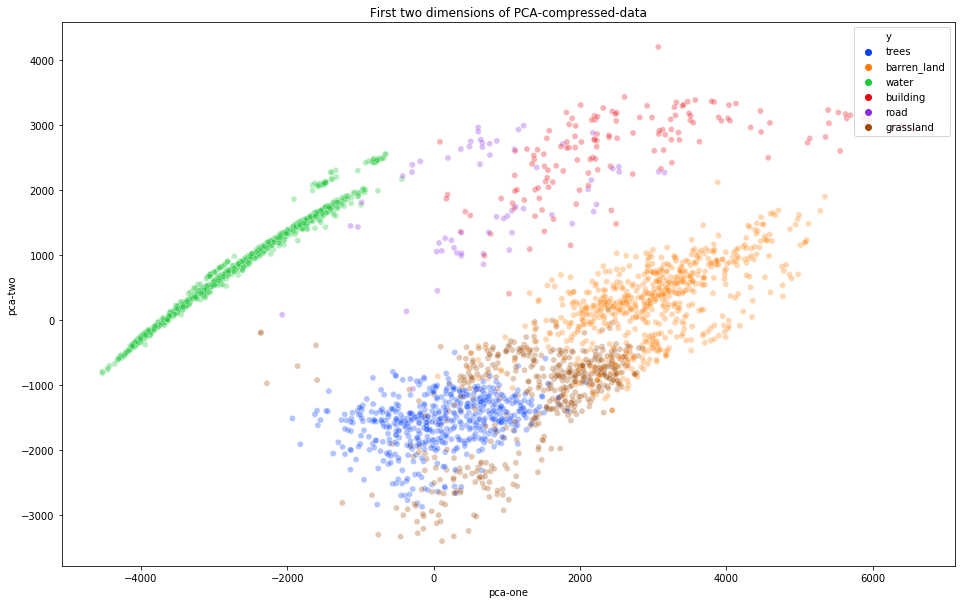

In [41]:
plt.figure(figsize=(16,10))
g_pca_2d = sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("bright", 6),
    data=df.loc[:,:],
    legend="full",
    alpha=0.3
)

g_pca_2d.legend(loc='upper right')
g_pca_2d.set_title("First two dimensions of PCA-compressed-data")

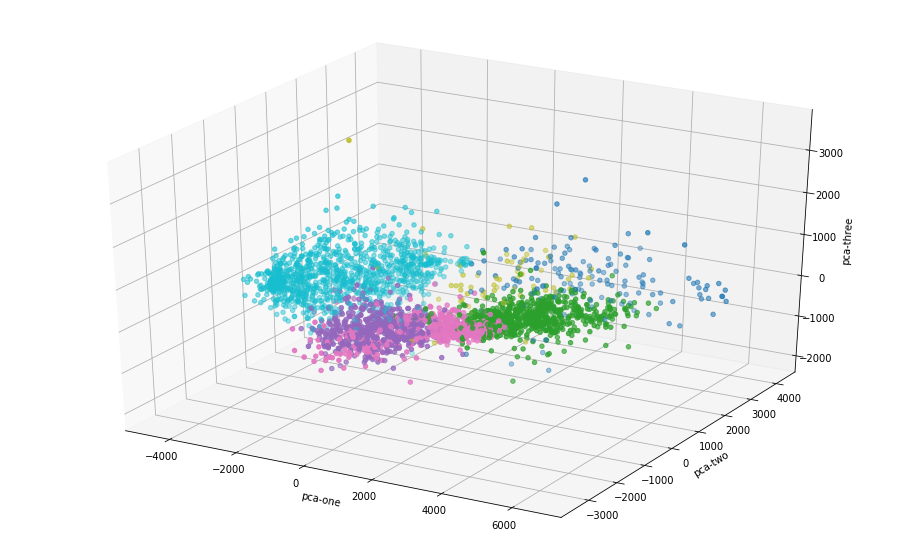

In [42]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["numeric_label"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')

plt.show()




---



---

**fit TSNE to PCA-compressed-data**:
*   First, compress the data two 3-dimensions
*   Then, use TSNE to visualize the data in 2D



In [43]:
df_subset = df.loc[rndperm,:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.395s...
[t-SNE] Computed neighbors for 3000 samples in 40.864s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 310.517386
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.007584
[t-SNE] KL divergence after 300 iterations: 1.464858
t-SNE done! Time elapsed: 51.293962240219116 seconds


**Plot TSNE using seaborn's scatterplot:**

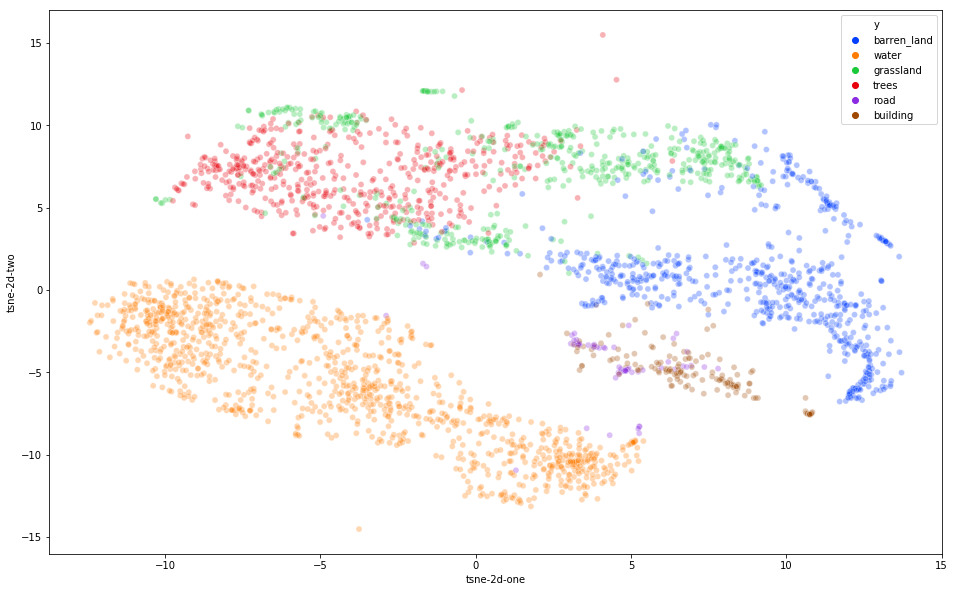

In [44]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("bright", 6),
    data=df_subset,
    legend="full",
    alpha=0.3
)



---



---

**You don't necessarily do PCA-compression into 3-dimensions:**
*   If you want to save larger portion of data before TSNE-visualization, reduce the dimensionaly into k-dimensions
*   For example, reduce the dimensionality of data from **3136** to **5**.
*   Fit another PCA with 5 principal components
*   Fit TSNE to PCA-compressed-data (with 5 dimensions) to visualize the data in 2D



In [50]:
pca_5 = PCA(n_components=5)
pca_result_5 = pca_5.fit_transform(data_subset)
print('Explained variation for 5 principal components: {}'.format(pca_5.explained_variance_ratio_))
print('Cumulative explained variation for 5 principal components: {}'.format(np.sum(pca_5.explained_variance_ratio_)))

Explained variation for 5 principal components: [0.65892326 0.17176854 0.01565496 0.00871125 0.00635331]
Cumulative explained variation for 5 principal components: 0.8614113193583515



**These variations mean:**
*   the 1st principal component of PCA (first dimension of compressed data) has the highest variance: **0.65892326**
*   the 2nd principal component of PCA (second dimension of compressed data) has the variance of: **0.17176854**
*   the 3rd principal component of PCA (third dimension of compressed data) has the variance of: **0.01565496**
*   the 4th principal component of PCA (fourth dimension of compressed data) has the variance of: **0.00871125**
*   the 5th principal component of PCA (fifth dimension of compressed data) has the variance of: **0.00635331**

**Which means:**
*   we saved **86.14%** of information from original data (images)
*   when we describe the data with 5 dimensions, we would lose **13.86%** of information


In [46]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_5)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 9.988891124725342 seconds


Let's plot three different plots together:


1.   PCA plot (fit PCA with 3 principal components and directly visualize)
2.   TSNE plot (fit TSNE to PCA-compressed-data with 3 principal components) on 2D
3.   TSNE plot (fit TSNE to PCA-compressed-data with 5 principal components) on 2D



Text(0.5, 1.0, 't-SNE plot of PCA (compressed into 5 dimensions)')

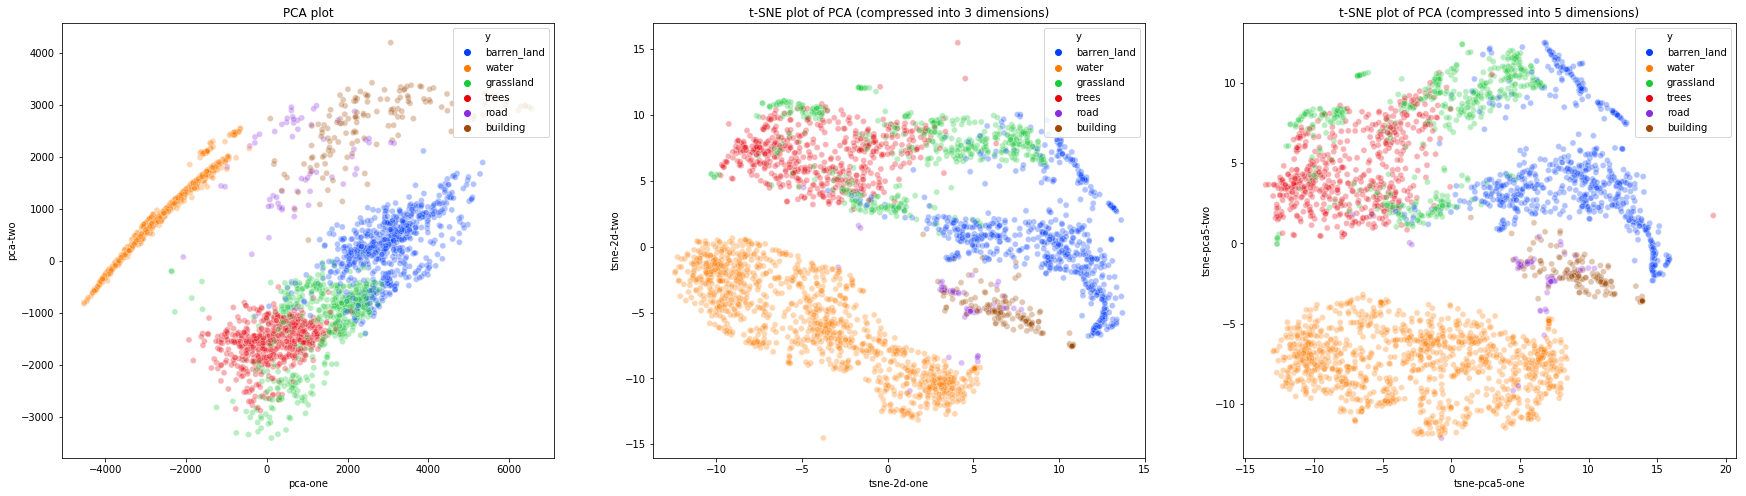

In [47]:
df_subset['tsne-pca5-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca5-two'] = tsne_pca_results[:,1]


plt.figure(figsize=(30,8))
ax1 = plt.subplot(1, 3, 1)
g1 = sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("bright", 6),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
g2 = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("bright", 6),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
g3 = sns.scatterplot(
    x="tsne-pca5-one", y="tsne-pca5-two",
    hue="y",
    palette=sns.color_palette("bright", 6),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)

g1.legend(loc='upper right')
g1.set_title("PCA plot")
g2.legend(loc='upper right')
g2.set_title("t-SNE plot of PCA (compressed into 3 dimensions)")
g3.legend(loc='upper right')
g3.set_title("t-SNE plot of PCA (compressed into 5 dimensions)")


In [48]:
!pip install art==3.6

In [49]:
from art import *
tprint("Thank you!!!", font="sub-zero")
tprint("(MLT Team)", "sub-zero")

 ______   __  __     ______     __   __     __  __        __  __     ______     __  __    
/\__  _\ /\ \_\ \   /\  __ \   /\ "-.\ \   /\ \/ /       /\ \_\ \   /\  __ \   /\ \/\ \   
\/_/\ \/ \ \  __ \  \ \  __ \  \ \ \-.  \  \ \  _"-.     \ \____ \  \ \ \/\ \  \ \ \_\ \  
   \ \_\  \ \_\ \_\  \ \_\ \_\  \ \_\\"\_\  \ \_\ \_\     \/\_____\  \ \_____\  \ \_____\ 
    \/_/   \/_/\/_/   \/_/\/_/   \/_/ \/_/   \/_/\/_/      \/_____/   \/_____/   \/_____/ 
                                                                                          

 __    __     __         ______      ______   ______     ______     __    __    
/\ "-./  \   /\ \       /\__  _\    /\__  _\ /\  ___\   /\  __ \   /\ "-./  \   
\ \ \-./\ \  \ \ \____  \/_/\ \/    \/_/\ \/ \ \  __\   \ \  __ \  \ \ \-./\ \  
 \ \_\ \ \_\  \ \_____\    \ \_\       \ \_\  \ \_____\  \ \_\ \_\  \ \_\ \ \_\ 
  \/_/  \/_/   \/_____/     \/_/        \/_/   \/_____/   \/_/\/_/   \/_/  \/_/ 
                                                